In [1]:
import numpy as np
from random_radon_transform import *
from matplotlib import pyplot as plt

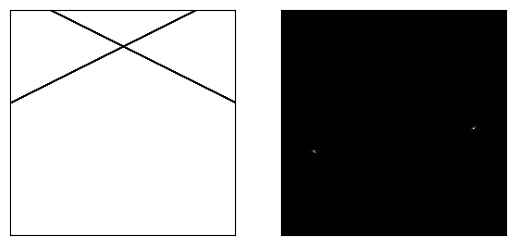

In [2]:


steps = 80
radon = random_radon_transformation(img, rho_steps=steps, theta_steps=steps * 2, n_iter=int(1e4))

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(radon, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
